# Звіт до лабораторної роботи №2 (Сенчак Павло ОІ-21сп)

In [1]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Перевірка наявності та читання файлу

In [3]:
print(os.path.exists("variant_1.csv"))

True


In [4]:
df = pd.read_csv("variant_1.csv")

## Початкове ознайомлення з даними

In [5]:
df.head()

,Unnamed: 0,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1
1,1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1
2,2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0
3,3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0
4,4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0


In [6]:
df.drop(columns=[df.columns[0], 'year'], inplace=True)
df.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,24890,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1
1,24891,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1
2,24892,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0
3,24893,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0
4,24894,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges            109028 non-null  float64
 13  term                       14

In [8]:
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(x, df[x].isnull().sum())

loan_limit 3344
approv_in_adv 908
loan_purpose 134
rate_of_interest 36439
Interest_rate_spread 36639
Upfront_charges 39642
term 41
Neg_ammortization 121
property_value 15098
income 9150
age 200
submission_of_application 200
LTV 15098


In [9]:
df.describe().round(2)

,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,148670.00,148670.00,112231.00,112031.00,109028.00,148629.00,133572.00,139520.00,148670.00,133572.00,148670.00
mean,99224.50,331117.74,4.05,0.44,3225.00,335.14,497893.47,6957.34,699.79,72.75,0.25
std,42917.48,183909.31,0.56,0.51,3251.12,58.41,359935.32,6496.59,115.88,39.97,0.43
min,24890.00,16500.00,0.00,-3.64,0.00,96.00,8000.00,0.00,500.00,0.97,0.00
25%,62057.25,196500.00,3.62,0.08,581.49,360.00,268000.00,3720.00,599.00,60.47,0.00
50%,99224.50,296500.00,3.99,0.39,2596.45,360.00,418000.00,5760.00,699.00,75.14,0.00
75%,136391.75,436500.00,4.38,0.78,4812.50,360.00,628000.00,8520.00,800.00,86.18,0.00
max,173559.00,3576500.00,8.00,3.36,60000.00,360.00,16508000.00,578580.00,900.00,7831.25,1.00


## Обробка аномальних значень

In [10]:
def find_skewed_boundaries(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    return lower_bound, upper_bound

In [11]:
lower_bound_income, upper_bound_income = find_skewed_boundaries(df, 'income')
lower_bound_loan, upper_bound_loan = find_skewed_boundaries(df, 'loan_amount')

# Виявлення аномальних значень
anomalies = df[(df['income'] < lower_bound_income) | (df['income'] > upper_bound_income) |
               (df['loan_amount'] < lower_bound_loan) | (df['loan_amount'] > upper_bound_loan)]

df = df.drop(anomalies.index)

print("Оновлений DataFrame без аномальних значень:")
df.describe().round(2)

Оновлений DataFrame без аномальних значень:


,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,146342.00,146342.00,110595.00,110396.00,107475.00,146304.00,131526.00,137210.00,146342.00,131526.00,146342.00
mean,99217.14,325138.80,4.05,0.44,3218.00,335.37,486055.14,6472.62,699.78,72.91,0.25
std,42917.38,169420.78,0.56,0.51,3212.61,58.11,325609.84,3835.24,115.87,40.18,0.43
min,24890.00,16500.00,0.00,-3.64,0.00,96.00,8000.00,0.00,500.00,2.07,0.00
25%,62053.25,196500.00,3.62,0.08,592.19,360.00,268000.00,3720.00,599.00,60.66,0.00
50%,99228.50,296500.00,3.99,0.39,2605.58,360.00,418000.00,5640.00,699.00,75.20,0.00
75%,136374.75,436500.00,4.38,0.78,4805.74,360.00,618000.00,8340.00,800.00,86.39,0.00
max,173559.00,1156500.00,8.00,3.36,32850.00,360.00,12008000.00,22920.00,900.00,7831.25,1.00


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


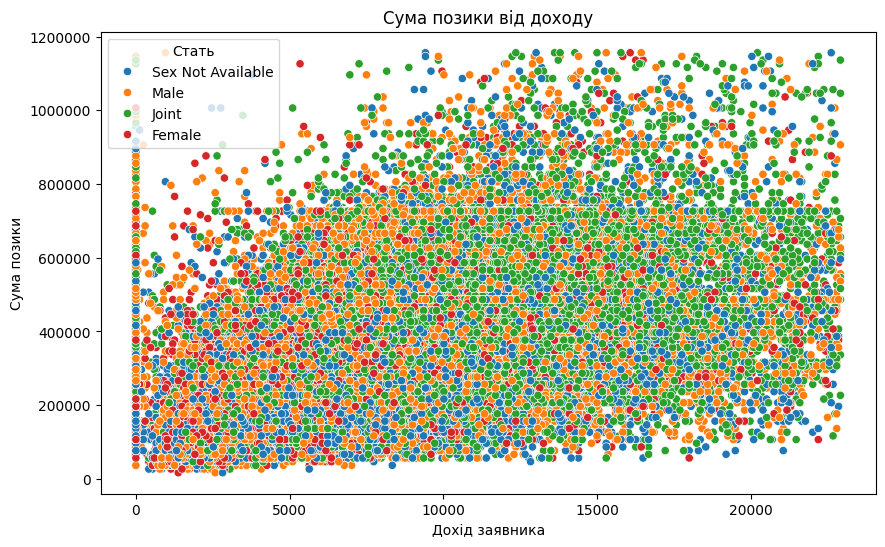

In [12]:
def thousands_formatter(x, pos):
    return f'{int(x)}'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['income'], y=df['loan_amount'], hue='Gender')
plt.title('Сума позики від доходу')
plt.xlabel('Дохід заявника')
plt.ylabel('Сума позики')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.legend(title='Стать')
plt.show()

In [13]:
lower_bound_upfront_charges, upper_bound_upfront_charges = find_skewed_boundaries(df, 'Upfront_charges')

# Виявлення аномальних значень
anomalies = df[(df['Upfront_charges'] < lower_bound_upfront_charges) | (df['Upfront_charges'] > upper_bound_upfront_charges)]

df = df.drop(anomalies.index)

print("Оновлений DataFrame без аномальних значень:")
df.describe().round(2)

Оновлений DataFrame без аномальних значень:


,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,145934.00,145934.00,110187.00,109988.00,107067.00,145896.00,131118.00,136802.00,145934.00,131118.00,145934.00
mean,99216.69,324212.05,4.05,0.44,3152.14,335.33,484238.12,6462.09,699.79,72.93,0.25
std,42921.86,168617.65,0.56,0.51,3030.93,58.15,323305.56,3830.30,115.87,40.23,0.43
min,24890.00,16500.00,0.00,-3.64,0.00,96.00,8000.00,0.00,500.00,2.07,0.00
25%,62049.25,196500.00,3.62,0.08,581.98,360.00,268000.00,3720.00,599.00,60.66,0.00
50%,99220.50,296500.00,3.99,0.39,2590.00,360.00,408000.00,5640.00,699.00,75.20,0.00
75%,136380.75,426500.00,4.38,0.78,4772.04,360.00,608000.00,8340.00,800.00,86.39,0.00
max,173559.00,1156500.00,8.00,3.36,17436.60,360.00,12008000.00,22920.00,900.00,7831.25,1.00


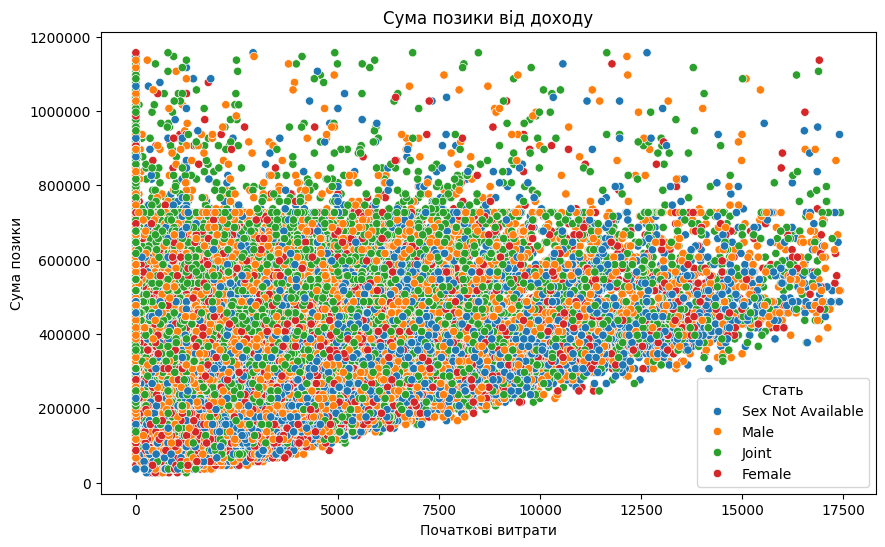

In [14]:
def thousands_formatter(x, pos):
    return f'{int(x)}'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['Upfront_charges'], y=df['loan_amount'], hue='Gender')
plt.title('Сума позики від доходу')
plt.xlabel('Початкові витрати')
plt.ylabel('Сума позики')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.legend(title='Стать')
plt.show()

In [15]:
lower_bound_property_value, upper_bound_property_value = find_skewed_boundaries(df, 'property_value')

# Виявлення аномальних значень
anomalies = df[(df['property_value'] < lower_bound_property_value) | (df['property_value'] > upper_bound_property_value)]

df = df.drop(anomalies.index)

print("Оновлений DataFrame без аномальних значень:")
df.describe().round(2)

Оновлений DataFrame без аномальних значень:


,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,144628.00,144628.00,109132.00,108933.00,106106.00,144590.00,129812.00,135509.00,144628.00,129812.00,144628.00
mean,99200.67,321840.94,4.05,0.45,3157.34,335.33,466892.86,6413.88,699.81,73.38,0.25
std,42923.73,165956.78,0.56,0.51,3021.13,58.12,265270.57,3784.98,115.87,40.16,0.43
min,24890.00,16500.00,0.00,-3.64,0.00,96.00,8000.00,0.00,500.00,3.08,0.00
25%,62020.75,196500.00,3.62,0.08,598.23,360.00,268000.00,3660.00,599.00,61.45,0.00
50%,99206.50,296500.00,3.99,0.40,2605.00,360.00,408000.00,5640.00,699.00,75.39,0.00
75%,136370.25,426500.00,4.38,0.78,4777.13,360.00,608000.00,8280.00,800.00,86.57,0.00
max,173559.00,1156500.00,8.00,3.36,17436.60,360.00,1628000.00,22920.00,900.00,7831.25,1.00


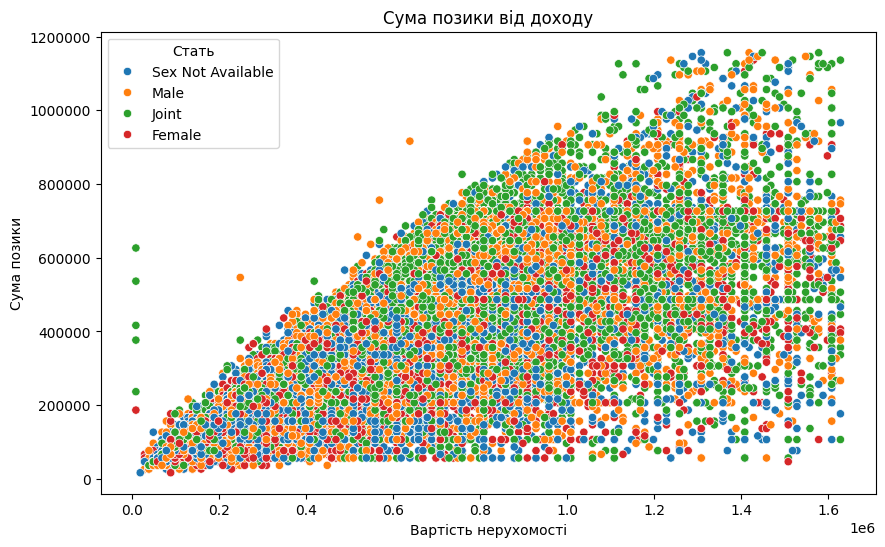

In [16]:
def thousands_formatter(x, pos):
    return f'{int(x)}'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['property_value'], y=df['loan_amount'], hue='Gender')
plt.title('Сума позики від доходу')
plt.xlabel('Вартість нерухомості')
plt.ylabel('Сума позики')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.legend(title='Стать')
plt.show()

In [17]:
lower_bound_LTV, upper_bound_LTV = find_skewed_boundaries(df, 'LTV')

# Виявлення аномальних значень
anomalies = df[(df['LTV'] < lower_bound_LTV) | (df['LTV'] > upper_bound_LTV)]

df = df.drop(anomalies.index)

print("Оновлений DataFrame без аномальних значень:")
df.describe().round(2)

Оновлений DataFrame без аномальних значень:


,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,144601.00,144601.00,109126.00,108927.00,106100.00,144563.00,129785.00,135489.00,144601.00,129785.00,144601.00
mean,99200.07,321864.35,4.05,0.45,3157.52,335.33,466977.85,6414.14,699.81,73.13,0.25
std,42923.50,165949.28,0.56,0.51,3021.12,58.12,265231.66,3784.92,115.88,18.34,0.43
min,24890.00,16500.00,0.00,-3.64,0.00,96.00,18000.00,0.00,500.00,3.08,0.00
25%,62020.00,196500.00,3.62,0.08,599.30,360.00,268000.00,3660.00,599.00,61.43,0.00
50%,99207.00,296500.00,3.99,0.40,2605.06,360.00,408000.00,5640.00,699.00,75.39,0.00
75%,136369.00,426500.00,4.38,0.78,4777.30,360.00,608000.00,8280.00,800.00,86.53,0.00
max,173559.00,1156500.00,8.00,3.36,17436.60,360.00,1628000.00,22920.00,900.00,159.38,1.00


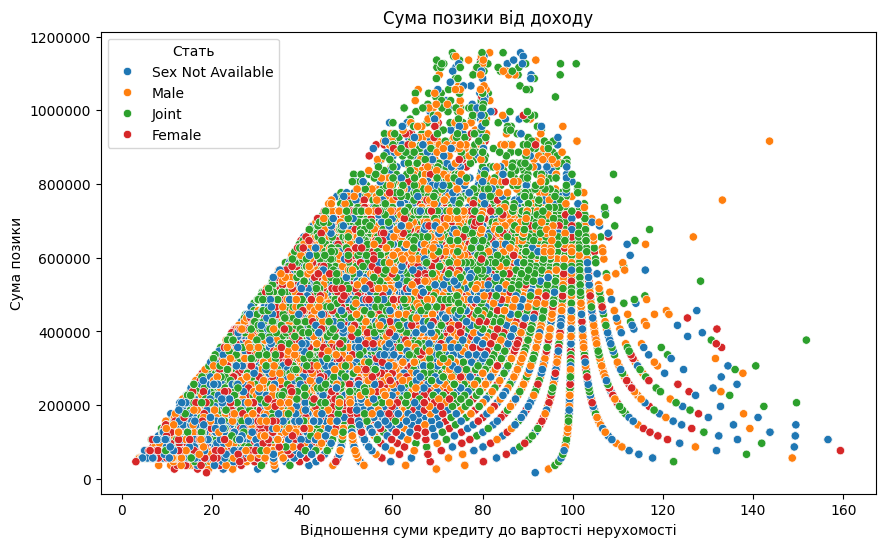

In [18]:
def thousands_formatter(x, pos):
    return f'{int(x)}'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['LTV'], y=df['loan_amount'], hue='Gender')
plt.title('Сума позики від доходу')
plt.xlabel('Відношення суми кредиту до вартості нерухомості')
plt.ylabel('Сума позики')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.legend(title='Стать')
plt.show()

In [19]:
lower_bound_rate_of_interest, upper_bound_rate_of_interest = find_skewed_boundaries(df, 'rate_of_interest')

# Виявлення аномальних значень
anomalies = df[(df['rate_of_interest'] < lower_bound_rate_of_interest) | (df['rate_of_interest'] > upper_bound_rate_of_interest)]

df = df.drop(anomalies.index)

print("Оновлений DataFrame без аномальних значень:")
df.describe().round(2)

Оновлений DataFrame без аномальних значень:


,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,144587.00,144587.00,109112.00,108913.00,106091.00,144549.00,129771.00,135475.00,144587.00,129771.00,144587.00
mean,99201.72,321875.24,4.05,0.45,3157.59,335.33,466985.75,6413.90,699.81,73.13,0.25
std,42923.69,165949.84,0.56,0.51,3021.23,58.12,265237.50,3784.69,115.87,18.34,0.43
min,24890.00,16500.00,2.12,-1.08,0.00,96.00,18000.00,0.00,500.00,3.08,0.00
25%,62022.50,196500.00,3.62,0.08,598.83,360.00,268000.00,3660.00,599.00,61.43,0.00
50%,99209.00,296500.00,3.99,0.40,2605.18,360.00,408000.00,5640.00,699.00,75.39,0.00
75%,136371.50,426500.00,4.38,0.78,4777.50,360.00,608000.00,8280.00,800.00,86.53,0.00
max,173559.00,1156500.00,6.50,2.54,17436.60,360.00,1628000.00,22920.00,900.00,159.38,1.00


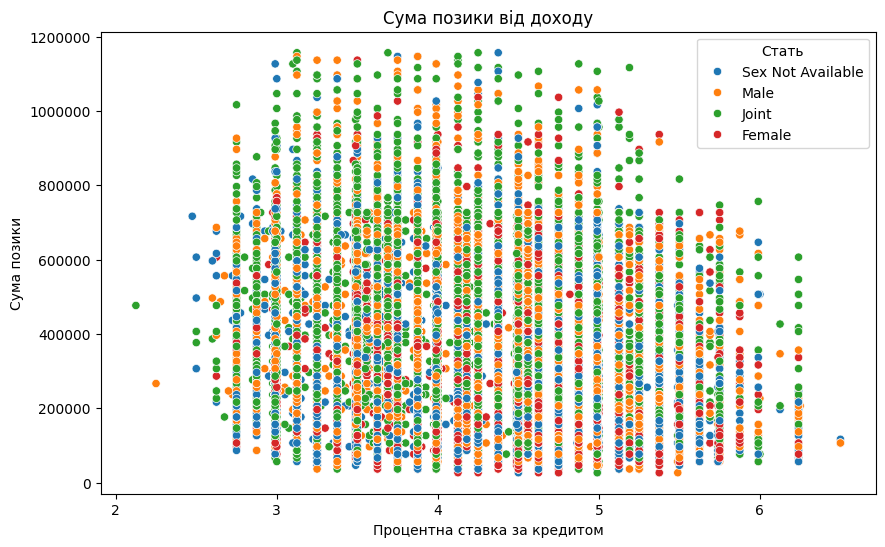

In [20]:
def thousands_formatter(x, pos):
    return f'{int(x)}'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['rate_of_interest'], y=df['loan_amount'], hue='Gender')
plt.title('Сума позики від доходу')
plt.xlabel('Процентна ставка за кредитом')
plt.ylabel('Сума позики')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.legend(title='Стать')
plt.show()

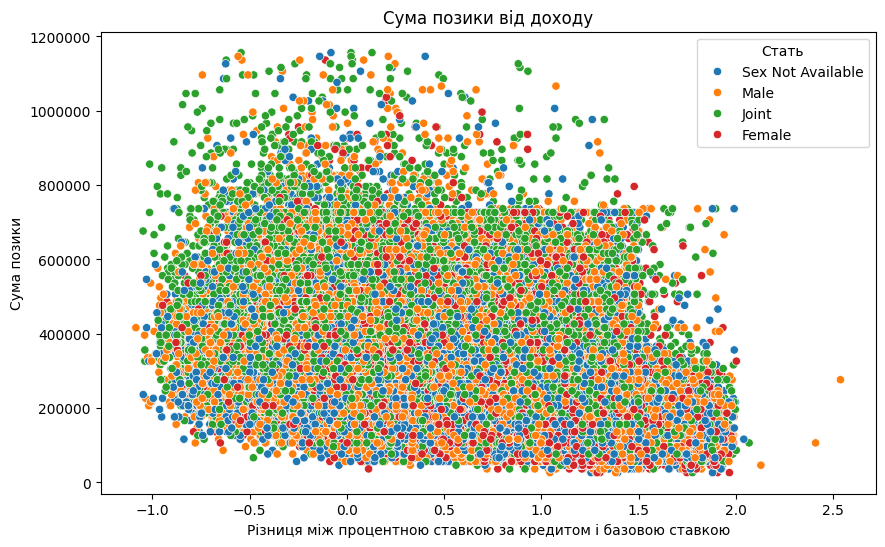

In [21]:
def thousands_formatter(x, pos):
    return f'{int(x)}'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['Interest_rate_spread'], y=df['loan_amount'], hue='Gender')
plt.title('Сума позики від доходу')
plt.xlabel('Різниця між процентною ставкою за кредитом і базовою ставкою')
plt.ylabel('Сума позики')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.legend(title='Стать')
plt.show()

## Заповнення пропущених даних

In [22]:
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(x, df[x].isnull().sum())

loan_limit 3271
approv_in_adv 883
loan_purpose 131
rate_of_interest 35475
Interest_rate_spread 35674
Upfront_charges 38496
term 38
Neg_ammortization 117
property_value 14816
income 9112
age 199
submission_of_application 199
LTV 14816


In [23]:
df.describe().round(2)

,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,144587.00,144587.00,109112.00,108913.00,106091.00,144549.00,129771.00,135475.00,144587.00,129771.00,144587.00
mean,99201.72,321875.24,4.05,0.45,3157.59,335.33,466985.75,6413.90,699.81,73.13,0.25
std,42923.69,165949.84,0.56,0.51,3021.23,58.12,265237.50,3784.69,115.87,18.34,0.43
min,24890.00,16500.00,2.12,-1.08,0.00,96.00,18000.00,0.00,500.00,3.08,0.00
25%,62022.50,196500.00,3.62,0.08,598.83,360.00,268000.00,3660.00,599.00,61.43,0.00
50%,99209.00,296500.00,3.99,0.40,2605.18,360.00,408000.00,5640.00,699.00,75.39,0.00
75%,136371.50,426500.00,4.38,0.78,4777.50,360.00,608000.00,8280.00,800.00,86.53,0.00
max,173559.00,1156500.00,6.50,2.54,17436.60,360.00,1628000.00,22920.00,900.00,159.38,1.00


In [24]:
df['rate_of_interest'] = df['rate_of_interest'].fillna(df['rate_of_interest'].mean())
df['Interest_rate_spread'] = df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].mean())
df['Upfront_charges'] = df['Upfront_charges'].fillna(df['Upfront_charges'].mean())
df['term'] = df['term'].fillna(df['term'].max())
df['property_value'] = df['property_value'].fillna(df['property_value'].mean())
df['income'] = df['income'].fillna(df['income'].mean())
df['LTV'] = df['LTV'].fillna(df['LTV'].mean())

In [25]:
df.describe().round(2)

,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,144587.00,144587.00,144587.00,144587.00,144587.00,144587.00,144587.00,144587.00,144587.00,144587.00,144587.00
mean,99201.72,321875.24,4.05,0.45,3157.59,335.34,466985.75,6413.90,699.81,73.13,0.25
std,42923.69,165949.84,0.48,0.44,2587.96,58.12,251280.60,3663.49,115.87,17.38,0.43
min,24890.00,16500.00,2.12,-1.08,0.00,96.00,18000.00,0.00,500.00,3.08,0.00
25%,62022.50,196500.00,3.75,0.19,1250.00,360.00,288000.00,3780.00,599.00,64.18,0.00
50%,99209.00,296500.00,4.05,0.45,3157.59,360.00,448000.00,5940.00,699.00,73.44,0.00
75%,136371.50,426500.00,4.25,0.63,3875.00,360.00,578000.00,8040.00,800.00,84.96,0.00
max,173559.00,1156500.00,6.50,2.54,17436.60,360.00,1628000.00,22920.00,900.00,159.38,1.00


In [26]:
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(x, df[x].isnull().sum())

loan_limit 3271
approv_in_adv 883
loan_purpose 131
Neg_ammortization 117
age 199
submission_of_application 199


In [27]:
df['loan_limit'].value_counts()

loan_limit
cf     132588
ncf      8728
Name: count, dtype: int64

In [28]:
df['loan_limit'] = df['loan_limit'].fillna(df['loan_limit'].mode()[0])

In [29]:
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(x, df[x].isnull().sum())

approv_in_adv 883
loan_purpose 131
Neg_ammortization 117
age 199
submission_of_application 199


In [30]:
approv_in_adv_counts = df['approv_in_adv'].value_counts()

print(approv_in_adv_counts)

approv_in_adv
nopre    121095
pre       22609
Name: count, dtype: int64


### Створення моделі для заповнення пропущених даних

Дана модель використовує дані для навчання з колонок наведених у змінній features. Модель використовує тільки записи в яких немає пропущених даних, 80% цих даних використовується для навчання, 20% - тестування.

In [31]:
df_not_null = df[df['approv_in_adv'].notnull()]
df_null = df[df['approv_in_adv'].isnull()]

features = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
            'Upfront_charges', 'property_value', 'income', 'Credit_Score', 'LTV']

df_not_null = df_not_null.dropna(subset=features)
df_null = df_null.dropna(subset=features)

X = df_not_null[features]
y = df_not_null['approv_in_adv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створити та навчити модель
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Передбачити пропущені значення
X_null = pd.get_dummies(df_null[features], drop_first=True)

# Переконатися, що у X_null є ті ж самі колонки, що й у X_train
X_null = X_null.reindex(columns=X_train.columns, fill_value=0)

df_null['approv_in_adv'] = clf.predict(X_null)

# Об'єднання даних
df_filled = pd.concat([df_not_null, df_null])

# Замінюємо відповідні значення в оригінальному датасеті df
df.update(df_filled)

# Переконатися, що всі пропущені значення заповнені
print(df['approv_in_adv'].isnull().sum())

Accuracy: 0.8392192338471174
0


In [32]:
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(x, df[x].isnull().sum())

loan_purpose 131
Neg_ammortization 117
age 199
submission_of_application 199


In [33]:
df.describe().round(2)

,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,144587.00,144587.00,144587.00,144587.00,144587.00,144587.00,144587.00,144587.00,144587.00,144587.00,144587.00
mean,99201.72,321875.24,4.05,0.45,3157.59,335.34,466985.75,6413.90,699.81,73.13,0.25
std,42923.69,165949.84,0.48,0.44,2587.96,58.12,251280.60,3663.49,115.87,17.38,0.43
min,24890.00,16500.00,2.12,-1.08,0.00,96.00,18000.00,0.00,500.00,3.08,0.00
25%,62022.50,196500.00,3.75,0.19,1250.00,360.00,288000.00,3780.00,599.00,64.18,0.00
50%,99209.00,296500.00,4.05,0.45,3157.59,360.00,448000.00,5940.00,699.00,73.44,0.00
75%,136371.50,426500.00,4.25,0.63,3875.00,360.00,578000.00,8040.00,800.00,84.96,0.00
max,173559.00,1156500.00,6.50,2.54,17436.60,360.00,1628000.00,22920.00,900.00,159.38,1.00


In [34]:
# Видалення рядків з пропущеними значеннями у вказаних колонках
df = df.dropna(subset=['loan_purpose', 'Neg_ammortization', 'age', 'submission_of_application'])

In [35]:
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(x, df[x].isnull().sum())

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144148 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         144148 non-null  int64  
 1   loan_limit                 144148 non-null  object 
 2   Gender                     144148 non-null  object 
 3   approv_in_adv              144148 non-null  object 
 4   loan_type                  144148 non-null  object 
 5   loan_purpose               144148 non-null  object 
 6   Credit_Worthiness          144148 non-null  object 
 7   open_credit                144148 non-null  object 
 8   business_or_commercial     144148 non-null  object 
 9   loan_amount                144148 non-null  int64  
 10  rate_of_interest           144148 non-null  float64
 11  Interest_rate_spread       144148 non-null  float64
 12  Upfront_charges            144148 non-null  float64
 13  term                       144148 

## Кодування категоріальних ознак

In [37]:
# for one hot encoding with sklearn
from sklearn.preprocessing import LabelEncoder


In [38]:
df.nunique()

ID                           144148
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     115
rate_of_interest                118
Interest_rate_spread          22396
Upfront_charges               56744
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  163
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                          384
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                               7
submission_of_application   

##### Let's explore the cardinality

In [39]:
df['loan_limit'].unique()

array(['cf', 'ncf'], dtype=object)

In [40]:
df['Gender'].isnull().sum()

np.int64(0)

In [41]:
pd.set_option('future.no_silent_downcasting', True)

# OPTION 1
df.replace({
    'age':{
        '<25': 1,
        '25-34': 2,
        '35-44': 2,
        '45-54': 4,
        '55-64': 5,
        '65-74': 6,
        '>74': 7,
    },
        
}, inplace=True)
df.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,24890,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.045968,0.446221,3157.58727,360.0,not_neg,not_int,not_lpsm,118000.000000,sb,pr,home,1U,1740.0,EXP,758,CIB,2,to_inst,98.728814,south,direct,1
1,24891,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.045968,0.446221,3157.58727,360.0,not_neg,not_int,lpsm,466985.751824,sb,pr,home,1U,4980.0,EQUI,552,EXP,5,to_inst,73.134888,North,direct,1
2,24892,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,0.200000,595.00000,360.0,neg_amm,not_int,not_lpsm,508000.000000,sb,pr,home,1U,9480.0,EXP,834,CIB,2,to_inst,80.019685,south,direct,0
3,24893,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,0.681000,3157.58727,360.0,not_neg,not_int,not_lpsm,658000.000000,sb,pr,home,1U,11880.0,EXP,587,CIB,4,not_inst,69.376900,North,direct,0
4,24894,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,0.304200,0.00000,360.0,not_neg,not_int,not_lpsm,758000.000000,sb,pr,home,1U,10440.0,CRIF,602,EXP,2,not_inst,91.886544,North,direct,0


In [42]:
# OPTION 2

label_encoder = LabelEncoder()
df['loan_limit'] = label_encoder.fit_transform(df['loan_limit'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['approv_in_adv'] = label_encoder.fit_transform(df['approv_in_adv'])
df['loan_type'] = label_encoder.fit_transform(df['loan_type'])
df['loan_purpose'] = label_encoder.fit_transform(df['loan_purpose'])
df['Credit_Worthiness'] = label_encoder.fit_transform(df['Credit_Worthiness'])
df['open_credit'] = label_encoder.fit_transform(df['open_credit'])
df['business_or_commercial'] = label_encoder.fit_transform(df['business_or_commercial'])
df['Neg_ammortization'] = label_encoder.fit_transform(df['Neg_ammortization'])
df['interest_only'] = label_encoder.fit_transform(df['interest_only'])
df['lump_sum_payment'] = label_encoder.fit_transform(df['lump_sum_payment'])
df['construction_type'] = label_encoder.fit_transform(df['construction_type'])
df['occupancy_type'] = label_encoder.fit_transform(df['occupancy_type'])
df['Secured_by'] = label_encoder.fit_transform(df['Secured_by'])
df['total_units'] = label_encoder.fit_transform(df['total_units'])
df['credit_type'] = label_encoder.fit_transform(df['credit_type'])
df['co-applicant_credit_type'] = label_encoder.fit_transform(df['co-applicant_credit_type'])
df['submission_of_application'] = label_encoder.fit_transform(df['submission_of_application'])
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Security_Type'] = label_encoder.fit_transform(df['Security_Type'])
df.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,24890,0,3,0,0,0,0,0,1,116500,4.045968,0.446221,3157.58727,360.0,1,1,1,118000.000000,1,1,0,0,1740.0,3,758,0,2,1,98.728814,3,1,1
1,24891,0,2,0,1,0,0,0,0,206500,4.045968,0.446221,3157.58727,360.0,1,1,0,466985.751824,1,1,0,0,4980.0,2,552,1,5,1,73.134888,0,1,1
2,24892,0,2,1,0,0,0,0,1,406500,4.560000,0.200000,595.00000,360.0,0,1,1,508000.000000,1,1,0,0,9480.0,3,834,0,2,1,80.019685,3,1,0
3,24893,0,2,0,0,3,0,0,1,456500,4.250000,0.681000,3157.58727,360.0,1,1,1,658000.000000,1,1,0,0,11880.0,3,587,0,4,0,69.376900,0,1,0
4,24894,0,1,1,0,0,0,0,1,696500,4.000000,0.304200,0.00000,360.0,1,1,1,758000.000000,1,1,0,0,10440.0,1,602,1,2,0,91.886544,0,1,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144148 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         144148 non-null  int64  
 1   loan_limit                 144148 non-null  int64  
 2   Gender                     144148 non-null  int64  
 3   approv_in_adv              144148 non-null  int64  
 4   loan_type                  144148 non-null  int64  
 5   loan_purpose               144148 non-null  int64  
 6   Credit_Worthiness          144148 non-null  int64  
 7   open_credit                144148 non-null  int64  
 8   business_or_commercial     144148 non-null  int64  
 9   loan_amount                144148 non-null  int64  
 10  rate_of_interest           144148 non-null  float64
 11  Interest_rate_spread       144148 non-null  float64
 12  Upfront_charges            144148 non-null  float64
 13  term                       144148 

In [44]:
df.replace({
    'Status':{
        0: 'Yes',
        1: 'No',
    },
        
}, inplace=True)
df.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,24890,0,3,0,0,0,0,0,1,116500,4.045968,0.446221,3157.58727,360.0,1,1,1,118000.000000,1,1,0,0,1740.0,3,758,0,2,1,98.728814,3,1,No
1,24891,0,2,0,1,0,0,0,0,206500,4.045968,0.446221,3157.58727,360.0,1,1,0,466985.751824,1,1,0,0,4980.0,2,552,1,5,1,73.134888,0,1,No
2,24892,0,2,1,0,0,0,0,1,406500,4.560000,0.200000,595.00000,360.0,0,1,1,508000.000000,1,1,0,0,9480.0,3,834,0,2,1,80.019685,3,1,Yes
3,24893,0,2,0,0,3,0,0,1,456500,4.250000,0.681000,3157.58727,360.0,1,1,1,658000.000000,1,1,0,0,11880.0,3,587,0,4,0,69.376900,0,1,Yes
4,24894,0,1,1,0,0,0,0,1,696500,4.000000,0.304200,0.00000,360.0,1,1,1,758000.000000,1,1,0,0,10440.0,1,602,1,2,0,91.886544,0,1,Yes


## Масштабування

In [45]:
df.describe().round(2)

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Region,Security_Type
count,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.0,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.0,144148.00,144148.00,144148.00,144148.00
mean,99193.97,0.06,1.61,0.16,0.34,1.88,0.04,0.00,0.86,322013.36,4.05,0.45,3160.19,335.32,0.9,0.95,0.98,467305.90,1.00,0.97,0.00,0.02,6413.68,1.34,699.79,0.5,0.65,73.11,1.41,1.00
std,42923.76,0.24,1.06,0.36,0.65,1.14,0.20,0.05,0.35,165901.28,0.48,0.45,2588.84,58.16,0.3,0.21,0.15,251246.99,0.01,0.26,0.01,0.18,3665.89,1.19,115.87,0.5,0.48,17.38,1.45,0.01
min,24890.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16500.00,2.12,-1.08,0.00,96.00,0.0,0.00,0.00,18000.00,0.00,0.00,0.00,0.00,0.00,0.00,500.00,0.0,0.00,3.08,0.00,0.00
25%,62014.75,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,196500.00,3.75,0.19,1250.00,360.00,1.0,1.00,1.00,288000.00,1.00,1.00,0.00,0.00,3780.00,0.00,599.00,0.0,0.00,64.18,0.00,1.00
50%,99194.50,0.00,2.00,0.00,0.00,2.00,0.00,0.00,1.00,296500.00,4.05,0.45,3157.59,360.00,1.0,1.00,1.00,448000.00,1.00,1.00,0.00,0.00,5880.00,1.00,699.00,0.0,1.00,73.33,0.00,1.00
75%,136363.25,0.00,3.00,0.00,0.00,3.00,0.00,0.00,1.00,426500.00,4.25,0.63,3880.00,360.00,1.0,1.00,1.00,578000.00,1.00,1.00,0.00,0.00,8040.00,3.00,800.00,1.0,1.00,84.93,3.00,1.00
max,173559.00,1.00,3.00,1.00,2.00,3.00,1.00,1.00,1.00,1156500.00,6.50,2.54,17436.60,360.00,1.0,1.00,1.00,1628000.00,1.00,2.00,1.00,3.00,22920.00,3.00,900.00,1.0,1.00,159.38,3.00,1.00


In [46]:
scaler = StandardScaler()
columns_to_standardize = ['loan_amount', 'Upfront_charges', 'property_value', 'income']

df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

print(df[columns_to_standardize].head())


   loan_amount  Upfront_charges  property_value    income
0    -1.238773        -0.001005       -1.390294 -1.274916
1    -0.696280        -0.001005       -0.001274 -0.391089
2     0.509260        -0.990868        0.161969  0.836448
3     0.810645        -0.001005        0.758993  1.491135
4     2.257294        -1.220701        1.157009  1.098323


In [51]:
columns_to_standardize_2 = ['term', 'Credit_Score', 'LTV']

df[columns_to_standardize_2] = scaler.fit_transform(df[columns_to_standardize_2])

print(df[columns_to_standardize_2].head())


       term  Credit_Score       LTV
0  0.424346      0.502424  1.474201
1  0.424346     -1.275484  0.001173
2  0.424346      1.158352  0.397419
3  0.424346     -0.973412 -0.215114
4  0.424346     -0.843953  1.080402


In [52]:
df[columns_to_standardize].describe().round(2)

,loan_amount,Upfront_charges,property_value,income
count,144148.00,144148.00,144148.00,144148.00
mean,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.84,-1.22,-1.79,-1.75
25%,-0.76,-0.74,-0.71,-0.72
50%,-0.15,-0.00,-0.08,-0.15
75%,0.63,0.28,0.44,0.44
max,5.03,5.51,4.62,4.50


In [53]:
df.describe().round(2)

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Region,Security_Type
count,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.0,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.00,144148.0,144148.00,144148.00,144148.00,144148.00
mean,99193.97,0.06,1.61,0.16,0.34,1.88,0.04,0.00,0.86,0.00,4.05,0.45,-0.00,-0.00,0.9,0.95,0.98,-0.00,1.00,0.97,0.00,0.02,0.00,1.34,-0.00,0.5,0.65,-0.00,1.41,1.00
std,42923.76,0.24,1.06,0.36,0.65,1.14,0.20,0.05,0.35,1.00,0.48,0.45,1.00,1.00,0.3,0.21,0.15,1.00,0.01,0.26,0.01,0.18,1.00,1.19,1.00,0.5,0.48,1.00,1.45,0.01
min,24890.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.84,2.12,-1.08,-1.22,-4.11,0.0,0.00,0.00,-1.79,0.00,0.00,0.00,0.00,-1.75,0.00,-1.72,0.0,0.00,-4.03,0.00,0.00
25%,62014.75,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,-0.76,3.75,0.19,-0.74,0.42,1.0,1.00,1.00,-0.71,1.00,1.00,0.00,0.00,-0.72,0.00,-0.87,0.0,0.00,-0.51,0.00,1.00
50%,99194.50,0.00,2.00,0.00,0.00,2.00,0.00,0.00,1.00,-0.15,4.05,0.45,-0.00,0.42,1.0,1.00,1.00,-0.08,1.00,1.00,0.00,0.00,-0.15,1.00,-0.01,0.0,1.00,0.01,0.00,1.00
75%,136363.25,0.00,3.00,0.00,0.00,3.00,0.00,0.00,1.00,0.63,4.25,0.63,0.28,0.42,1.0,1.00,1.00,0.44,1.00,1.00,0.00,0.00,0.44,3.00,0.86,1.0,1.00,0.68,3.00,1.00
max,173559.00,1.00,3.00,1.00,2.00,3.00,1.00,1.00,1.00,5.03,6.50,2.54,5.51,0.42,1.0,1.00,1.00,4.62,1.00,2.00,1.00,3.00,4.50,3.00,1.73,1.0,1.00,4.96,3.00,1.00


In [54]:
df.to_csv('new_variant_1.csv', index=False)